<a href="https://colab.research.google.com/github/anirbanghoshsbi/.github.io/blob/master/work/Breadth_Thrust_Indicator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
nifty=yf.download('^nsei', start="2019-01-01" )['Adj Close']
nifty50_url = "https://raw.githubusercontent.com/anirbanghoshsbi/data/main/ind_nifty50list.csv"
nifty50 = pd.read_csv(nifty50_url)
tickers = nifty50['Symbol'].apply(lambda x: x + ".NS").tolist()
# Bank Nifty Stocks
nifty50_tickers = tickers

# Download data for the last 5 years
data = yf.download(nifty50_tickers, start="2019-01-01")

# Calculate daily returns
daily_returns = data['Adj Close'].pct_change()
print(data.columns)
# Determine advancing and declining stocks
data['advancing'] = (daily_returns > 0).sum(axis=1)
data['declining'] = (daily_returns < 0).sum(axis=1)
# Calculate the number of advancing and declining stocks each day
# Calculate advancing and declining volumes
data['Vol_Up'] = (data['advancing'] * data['Volume']).sum(axis=1)
data['Vol_Dn'] = (data['declining'] * data['Volume']).sum(axis=1)

# Calculate Breadth Thrust Indicator
def calculate_breadth_thrust(breadth_data, period=15):
    # Calculate the Advance-Decline Ratio
    breadth_data['Advance-Decline Ratio'] = breadth_data['advancing'] / (breadth_data['declining']+breadth_data['advancing'])

    # Calculate the Breadth Thrust Indicator
    breadth_thrust = breadth_data['Advance-Decline Ratio'].rolling(window=period).mean()

    return breadth_thrust

data['Breadth Thrust'] = calculate_breadth_thrust(data)
# Calculate Volume Breadth Ratio
data['Volume Breadth Ratio'] = data['Vol_Up'] / data['Vol_Dn']



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  50 of 50 completed


MultiIndex([('Adj Close',   'ADANIENT.NS'),
            ('Adj Close', 'ADANIPORTS.NS'),
            ('Adj Close', 'APOLLOHOSP.NS'),
            ('Adj Close', 'ASIANPAINT.NS'),
            ('Adj Close',   'AXISBANK.NS'),
            ('Adj Close', 'BAJAJ-AUTO.NS'),
            ('Adj Close', 'BAJAJFINSV.NS'),
            ('Adj Close', 'BAJFINANCE.NS'),
            ('Adj Close', 'BHARTIARTL.NS'),
            ('Adj Close',       'BPCL.NS'),
            ...
            (   'Volume',  'SUNPHARMA.NS'),
            (   'Volume', 'TATACONSUM.NS'),
            (   'Volume', 'TATAMOTORS.NS'),
            (   'Volume',  'TATASTEEL.NS'),
            (   'Volume',        'TCS.NS'),
            (   'Volume',      'TECHM.NS'),
            (   'Volume',      'TITAN.NS'),
            (   'Volume', 'ULTRACEMCO.NS'),
            (   'Volume',        'UPL.NS'),
            (   'Volume',      'WIPRO.NS')],
           names=['Price', 'Ticker'], length=300)


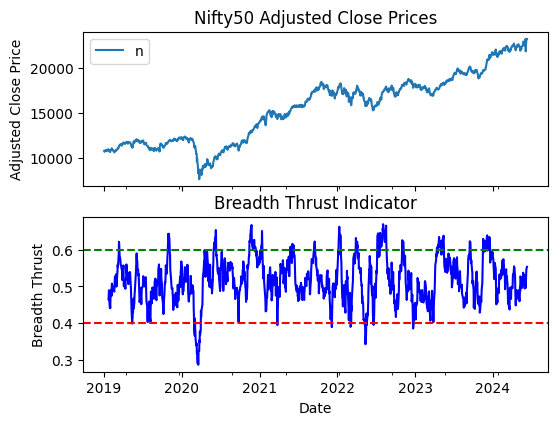

In [3]:

# Plotting the Close Prices and Breadth Thrust Indicator in two subplots
fig, axs = plt.subplots(2, 1, figsize=(6,5), sharex=True)

# Plot Close Prices
nifty.plot(ax=axs[0])
axs[0].set_title('Nifty50 Adjusted Close Prices')
axs[0].set_ylabel('Adjusted Close Price')
axs[0].legend('nifty close')

# Plot Breadth Thrust Indicator
axs[1].plot(data.index, data['Breadth Thrust'], label='Breadth Thrust Indicator', color='blue')
axs[1].axhline(0.4, color='red', linestyle='--', label='0.4 Threshold')
axs[1].axhline(0.6, color='green', linestyle='--', label='0.6 Threshold')
axs[1].set_title('Breadth Thrust Indicator')
axs[1].set_xlabel('Date')
axs[1].set_ylabel('Breadth Thrust')
#axs[1].legend()

plt.show()